In [1]:

#import all the libraries needed
from imports import *
# import my functions
from function_store import *

# Define the path to the output directory where data is saved
path_out =  ('/Users/horatiocox/Desktop/RUG Postdoc/UCL PostDoc/Experiments/Antonio Lombardo/CPW Memristor 1/Aferdita Measurements on FIB and nonfib ve_1_09-09-2024/VS_code Exports')

# Define the path to the directories containing the VNA data
directory_1 = ('/Users/horatiocox/Desktop/VNA_Analysis/CPW_mem_270824/SiOx/')
directory_2 = ('/Users/horatiocox/Desktop/VNA_Analysis/CPW_mem_270824/HfOx/')
directory_3 = ('/Users/horatiocox/Desktop/VNA_Analysis/CPW_mem_270824/SiOxFIB/')

directory_4 = ('/Users/horatiocox/Desktop/VNA_Analysis/CPW_mem_270824/')



### Import Data

In [2]:
# Import the data from the VNA files
s2p_files_1 = import_data(directory_1)
s2p_files_2 = import_data(directory_2)
s2p_files_3 = import_data(directory_3)

# Remove duplicate frequency points from all the thru data to prevent errors with skrf functions
s2p_files_1 = duplicate_check(s2p_files_1)
s2p_files_2 = duplicate_check(s2p_files_2)
s2p_files_3 = duplicate_check(s2p_files_3)

/Users/horatiocox/Desktop/VNA_Analysis/VNAenv/lib/python3.9/site-packages/skrf/frequency.py:273: InvalidFrequencyWarning: Frequency values are not monotonously increasing!
To get rid of the invalid values call `drop_non_monotonic_increasing`
  temp_freq.check_monotonic_increasing()


1 run1_rNonecNone_None_Noneohm AXh_HCoxMem_Air_27_08_24.S2P
2 run2_rNonecNone_thru_Noneohm AXh_HCoxMem_ISSThru_27_08_24.S2P
3 run3_rNonecNone_thru_Noneohm AXh_HCoxMem_WaferThru_27_08_24.S2P
4 run4_r2c8_pristine_Noneohm wafer2_r2_c8_pristine_1.S2P
5 run5_r2c8_pristine_Noneohm wafer2_r2_c8_pristine_2.S2P
6 run6_r2c8_pristine_Noneohm wafer2_r2_c8_pristine_3.S2P
7 run7_r3c8_pristine_Noneohm wafer2_r3_c8_pristine_1.S2P
8 run8_r3c8_pristine_Noneohm wafer2_r3_c8_pristine_2.S2P
9 run9_r3c8_pristine_Noneohm wafer2_r3_c8_pristine_3.S2P
10 run10_r6c8_pristine_Noneohm wafer2_r6_c8_pristine_1.S2P
11 run11_r6c8_pristine_Noneohm wafer2_r6_c8_pristine_2.S2P
12 run12_r6c8_pristine_Noneohm wafer2_r6_c8_pristine_3.S2P
13 run13_r1c9_pristine_Noneohm wafer2_r1_c9_pristine_1.S2P
14 run14_r1c9_pristine_Noneohm wafer2_r1_c9_pristine_2.S2P
15 run15_r1c9_pristine_Noneohm wafer2_r1_c9_pristine_3.S2P
16 run16_r2c9_pristine_Noneohm wafer2_r2_c9_pristine_1.S2P
17 run17_r2c9_pristine_Noneohm wafer2_r2_c9_pristine_2.

## Input $R_{DC}$ 
#### 1. Measure $R_{DC}$ from the IV data


In [3]:
import os
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

directory_res = '/Users/horatiocox/Desktop/RUG Postdoc/UCL PostDoc/Experiments/Antonio Lombardo/CPW Memristor 1/Aferdita Measurements on FIB and nonfib ve_1_09-09-2024/All Devices stiched together/r1c9'

# List to store the dataframes and filenames
csv_data = []

# Get the list of files in the directory and sort them
filenames = sorted([f for f in os.listdir(directory_res) if f.endswith('.csv')])

# Iterate over the sorted list of files
for filename in filenames:
    filepath = os.path.join(directory_res, filename)
    df = pd.read_csv(filepath, names=["V", "I", "R"])
    csv_data.append((filename, df))

print(csv_data[0][1].head(10))

# Iterate over the dataframes and plot them
for i, (filename, df) in enumerate(csv_data):
    fig = make_subplots(specs=[[{"secondary_y": True}]])
    
    # Plot IV data
    fig.add_trace(
        go.Scatter(x=df['V'], y=df['I'], mode='lines', name='I', line=dict(color='blue')),
        secondary_y=False,
    )
    
    # Plot resistance data
    fig.add_trace(
        go.Scatter(x=df['V'], y=df['V']/df['I'], mode='lines', name='R', line=dict(color='red')),
        secondary_y=True,
    )
    
    # Set axis titles
    fig.update_xaxes(title_text="V")
    fig.update_yaxes(title_text="I", secondary_y=False)
    fig.update_yaxes(title_text="R", secondary_y=True)
    if i == 1:
        fig.update_yaxes(range=[0, 1e6], secondary_y=True)
    
    # Set plot title
    fig.update_layout(title_text=filename)
    
    # Show the plot
    fig.show()

       V             I             R
0  0.000  1.700000e-14  0.000000e+00
1  0.001  2.560000e-13  3.906250e+09
2  0.002 -1.440000e-13 -1.388889e+10
3  0.003 -4.300000e-14 -6.976744e+10
4  0.004 -1.920000e-13 -2.083333e+10
5  0.005 -6.000000e-14 -8.333333e+10
6  0.006  4.700000e-14  1.276596e+11
7  0.007 -1.480000e-13 -4.729730e+10
8  0.008  5.420000e-13  1.476015e+10
9  0.009 -1.140000e-13 -7.894737e+10


#### 2. Input to S2P files in "res" property

#### 3. Save list of S2P files to Data_Folder to Prevent Overwrite (then you only have to do this step manually once)

In [4]:
#### COMMENT OUT THE SAVE AND CHANGE THE NAME ONCE FINISHED TO PREVENT AN OVERWRITE!!!!!

# Save the s2p files to the output directory
# Save the s2p file objects to a file
with open(f'{path_out}/s2p_files_1.pkl', 'wb') as f:
    pickle.dump(s2p_files_1, f)
with open(f'{path_out}/s2p_files_2.pkl', 'wb') as f:
    pickle.dump(s2p_files_2, f)
with open(f'{path_out}/s2p_files_3.pkl', 'wb') as f:
    pickle.dump(s2p_files_3, f)

# Reload the s2p file objects from the file
with open(f'{path_out}/s2p_files_1.pkl', 'rb') as f:
    s2p_files_1 = pickle.load(f)
with open(f'{path_out}/s2p_files_2.pkl', 'rb') as f:
    s2p_files_2 = pickle.load(f)
with open(f'{path_out}/s2p_files_3.pkl', 'rb') as f:
    s2p_files_3 = pickle.load(f)


### Plot Raw S-Params SiOx

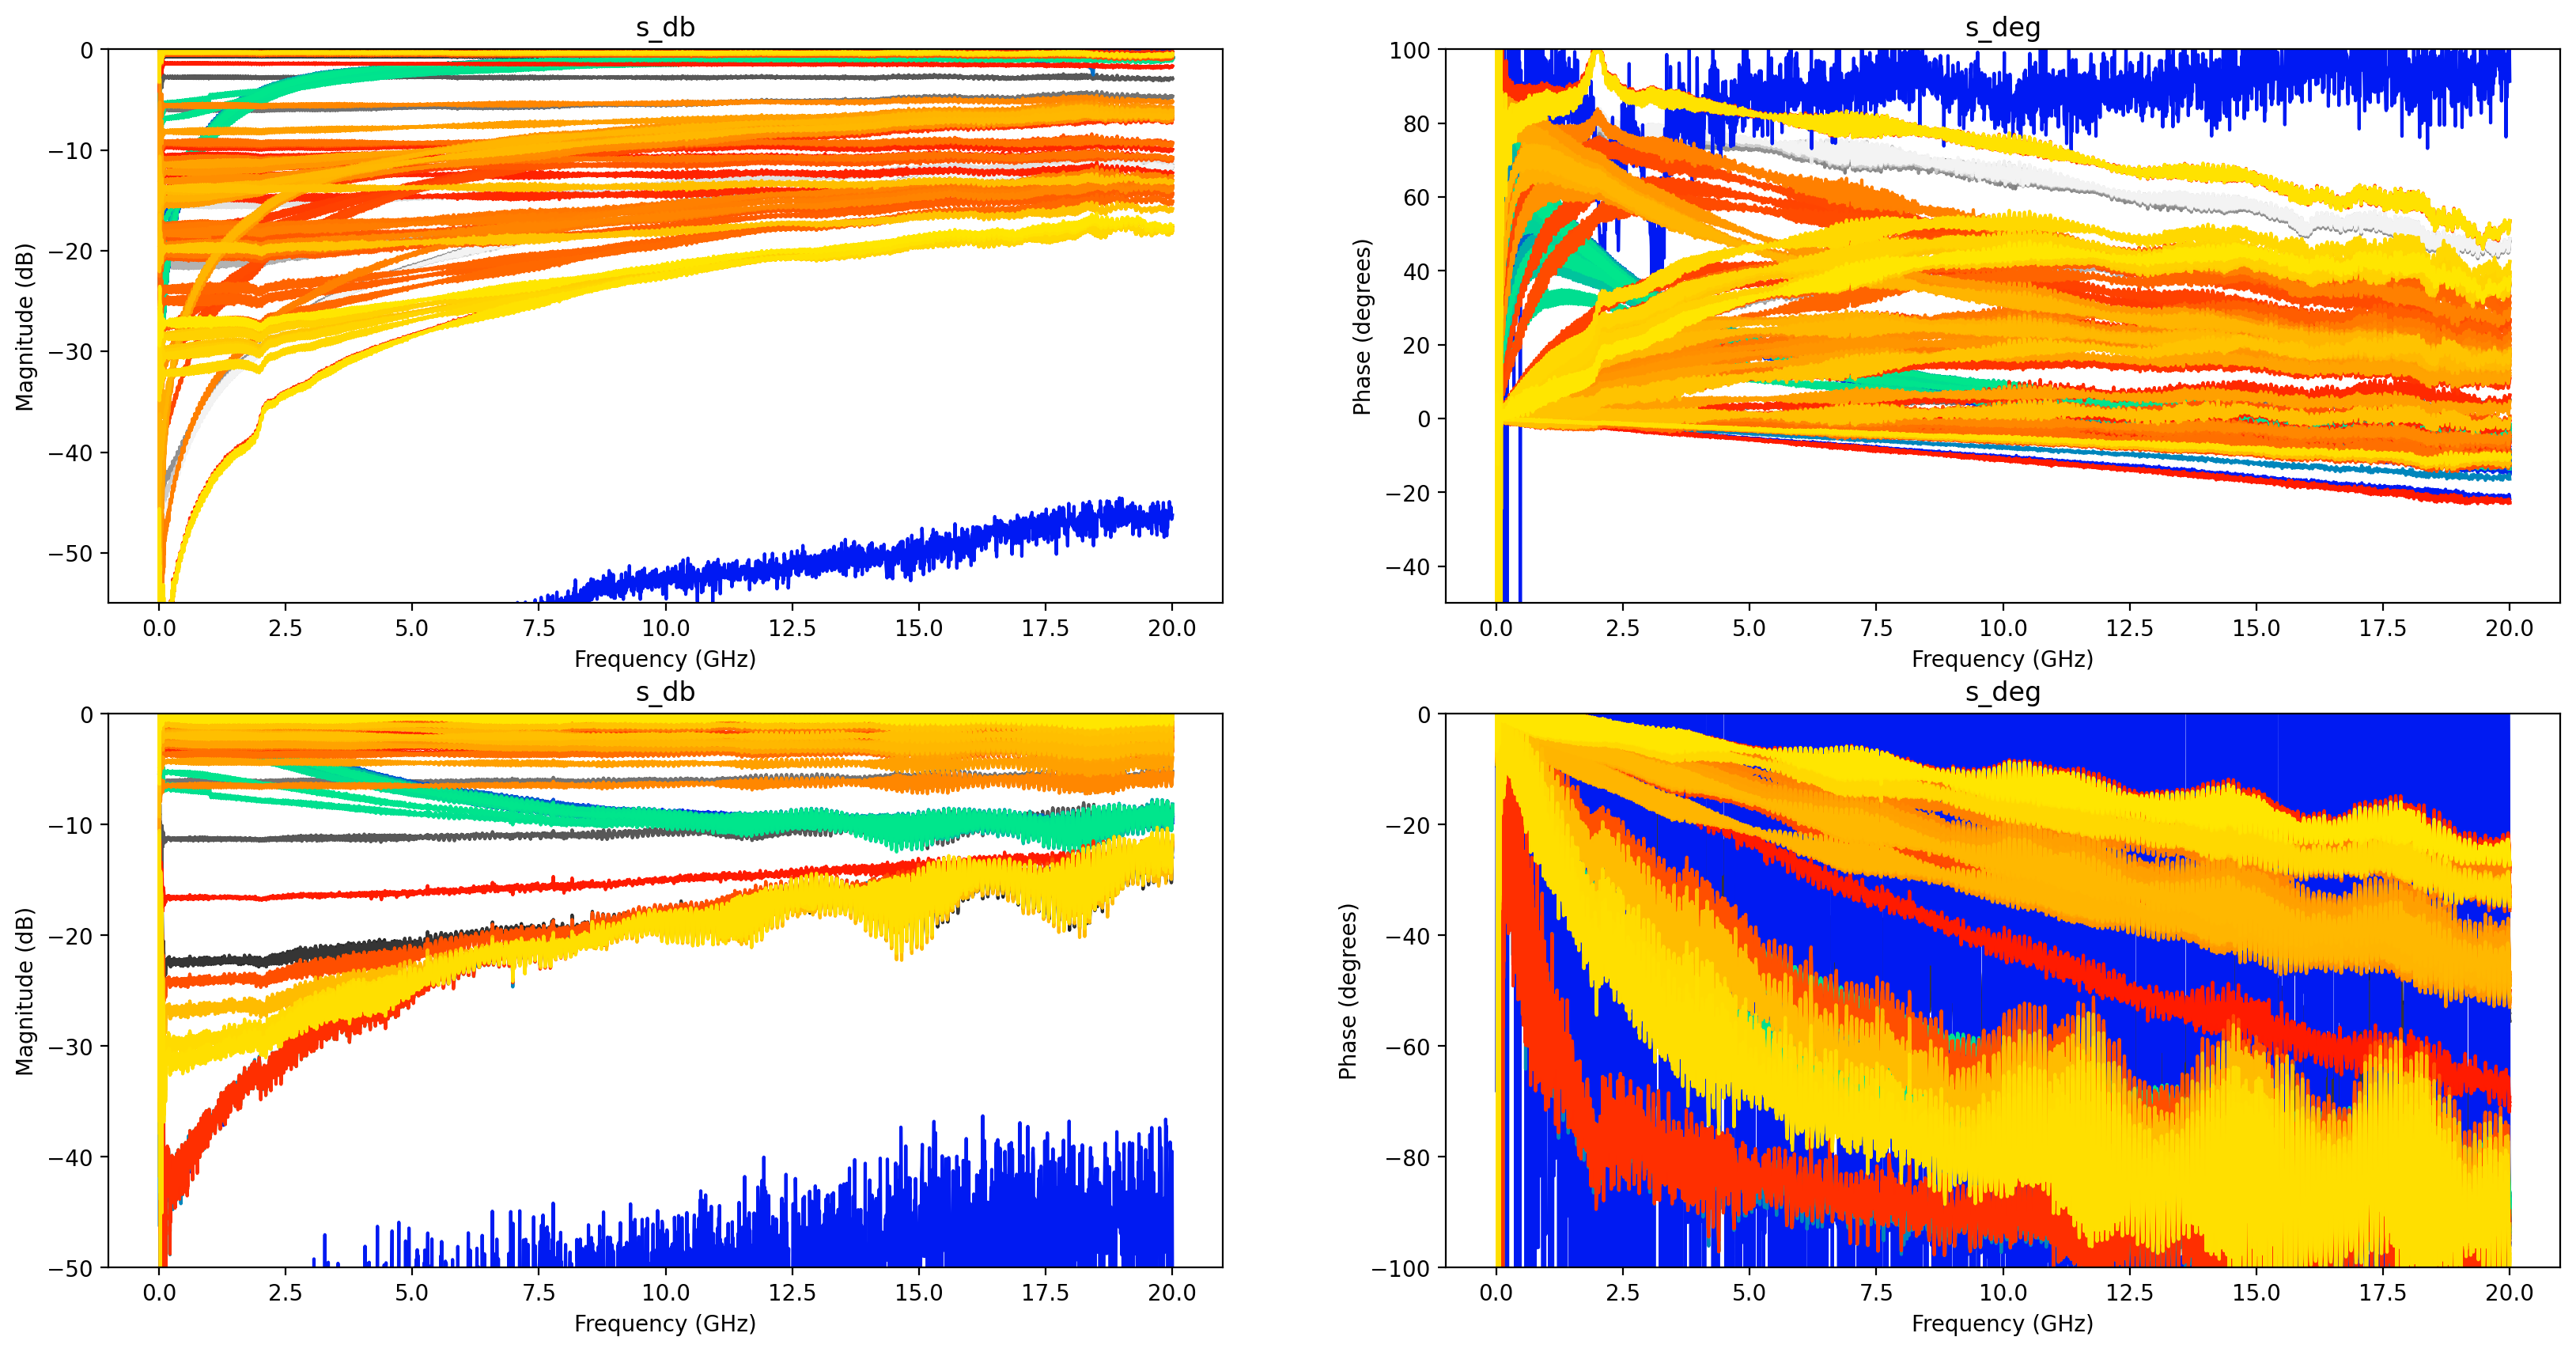

In [5]:
# Select ISS thru, on wafer thru, on wafer open and compare in one color to a pristine/formed/reset device in another color
raw_data_siox = [s2p_files_2,s2p_files_1,s2p_files_3]#subgen(s2p_files_1, run_nums =[[2,3],[4,5,6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24,25,26,27,28],list(range(28, 59)),list(range(58, 186))] )

# Plot the data
f = plt.figure(figsize=(20,10),dpi=200)
gs = f.add_gridspec(2, 2)

ax = f.add_subplot(gs[0, 0])
ax1 = f.add_subplot(gs[0, 1])
ax2 = f.add_subplot(gs[1, 0])
ax3 = f.add_subplot(gs[1, 1])

sub_plot(ax=ax, dev_subset=raw_data_siox, plot_type=['s_db'], log_x=False, m_port=[2], n_port=[1], deembed_data=False, 
         y_range = [-55,0],x_range='0.01-20ghz',p_legend=False)
sub_plot(ax=ax1, dev_subset=raw_data_siox, plot_type=['s_deg'], log_x=False, m_port=[2], n_port=[1], deembed_data=False, 
         y_range=[-50,100], x_range='0.01-20ghz',p_legend=False)
sub_plot(ax=ax2, dev_subset=raw_data_siox, plot_type=['s_db'], log_x=False, m_port=[1], n_port=[1], deembed_data=False, 
         y_range = [-50,0],x_range='0.01-20ghz',p_legend=False)
sub_plot(ax=ax3, dev_subset=raw_data_siox, plot_type=['s_deg'], log_x=False, m_port=[1], n_port=[1], deembed_data=False, 
         y_range=[-100,0], x_range='0.01-20ghz',p_legend=False)

plt.show()


### Plot Raw S-Params HfOx

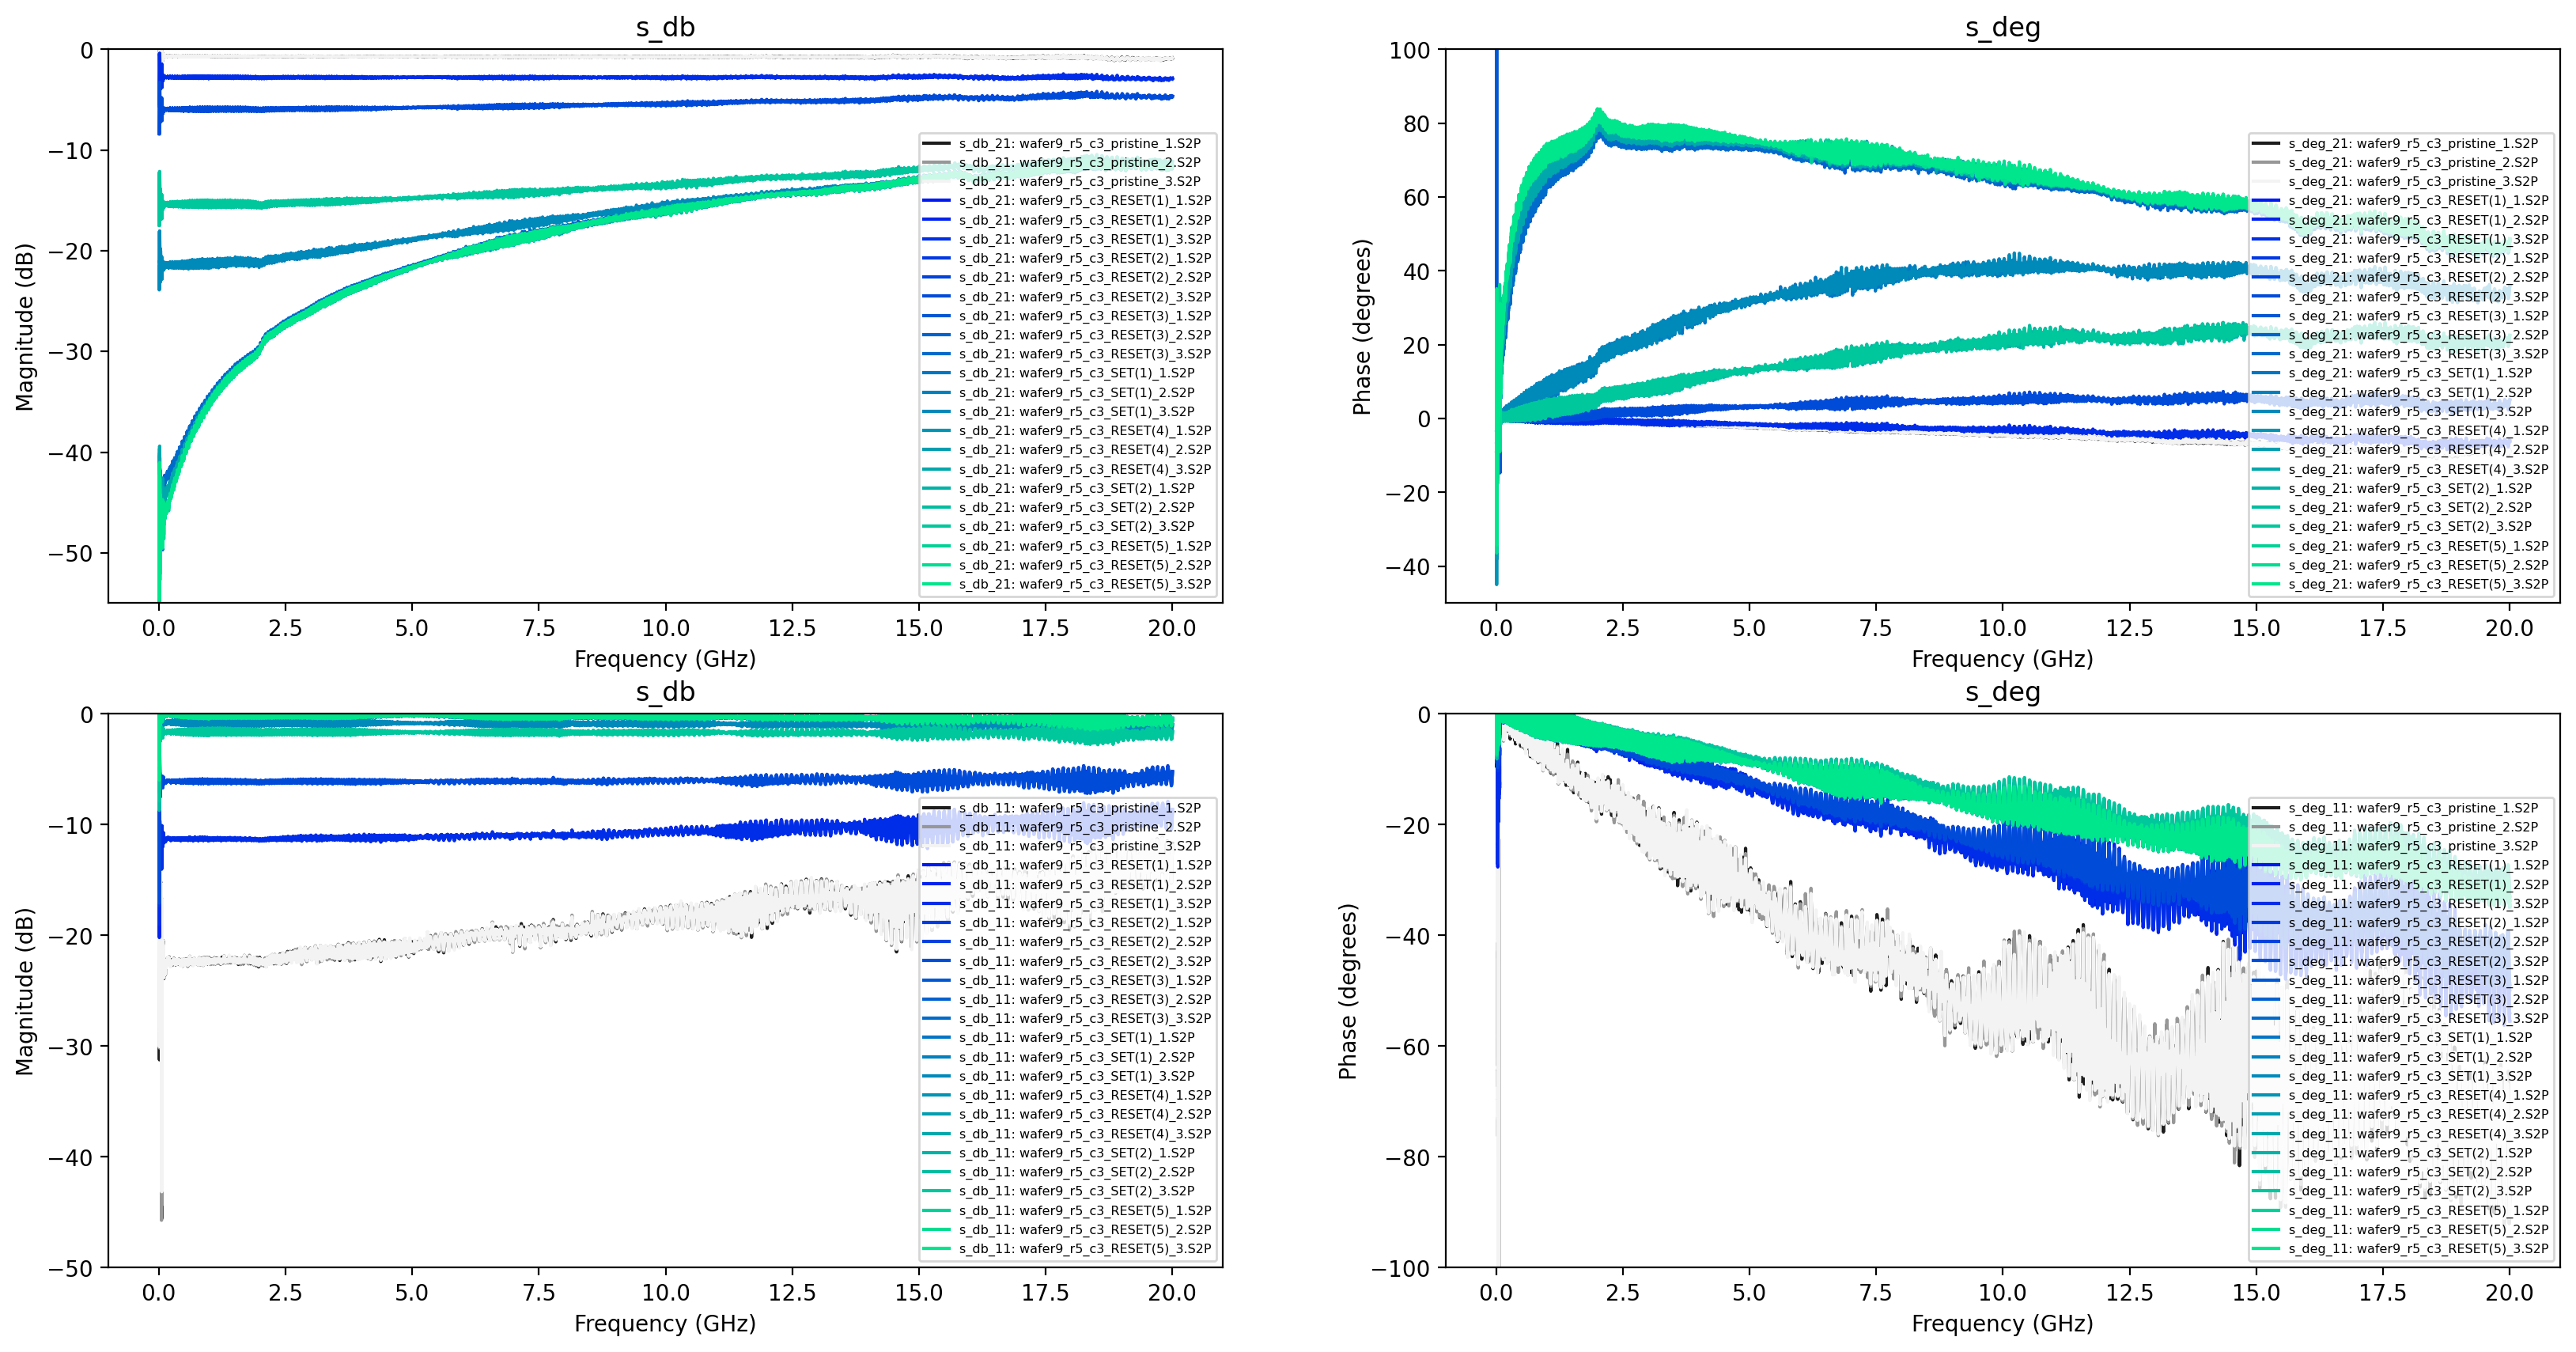

In [6]:
# Select ISS thru, on wafer thru, on wafer open and compare in one color to a pristine/formed/reset device in another color
raw_data_hf = subgen(s2p_files_2, run_nums =[[1,2,3],[ 4,5,6,7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]] )

# Plot the data
f = plt.figure(figsize=(20,10),dpi=200)
gs = f.add_gridspec(2, 2)

ax = f.add_subplot(gs[0, 0])
ax1 = f.add_subplot(gs[0, 1])
ax2 = f.add_subplot(gs[1, 0])
ax3 = f.add_subplot(gs[1, 1])

sub_plot(ax=ax, dev_subset=raw_data_hf, plot_type=['s_db'], log_x=False, m_port=[2], n_port=[1], deembed_data=False, 
         y_range = [-55,0],x_range='0.01-20ghz')
sub_plot(ax=ax1, dev_subset=raw_data_hf, plot_type=['s_deg'], log_x=False, m_port=[2], n_port=[1], deembed_data=False, 
         y_range=[-50,100], x_range='0.01-20ghz')
sub_plot(ax=ax2, dev_subset=raw_data_hf, plot_type=['s_db'], log_x=False, m_port=[1], n_port=[1], deembed_data=False, 
         y_range = [-50,0],x_range='0.01-20ghz')
sub_plot(ax=ax3, dev_subset=raw_data_hf, plot_type=['s_deg'], log_x=False, m_port=[1], n_port=[1], deembed_data=False, 
         y_range=[-100,0], x_range='0.01-20ghz')

plt.show()

### ABCD to Give Z mag and phase

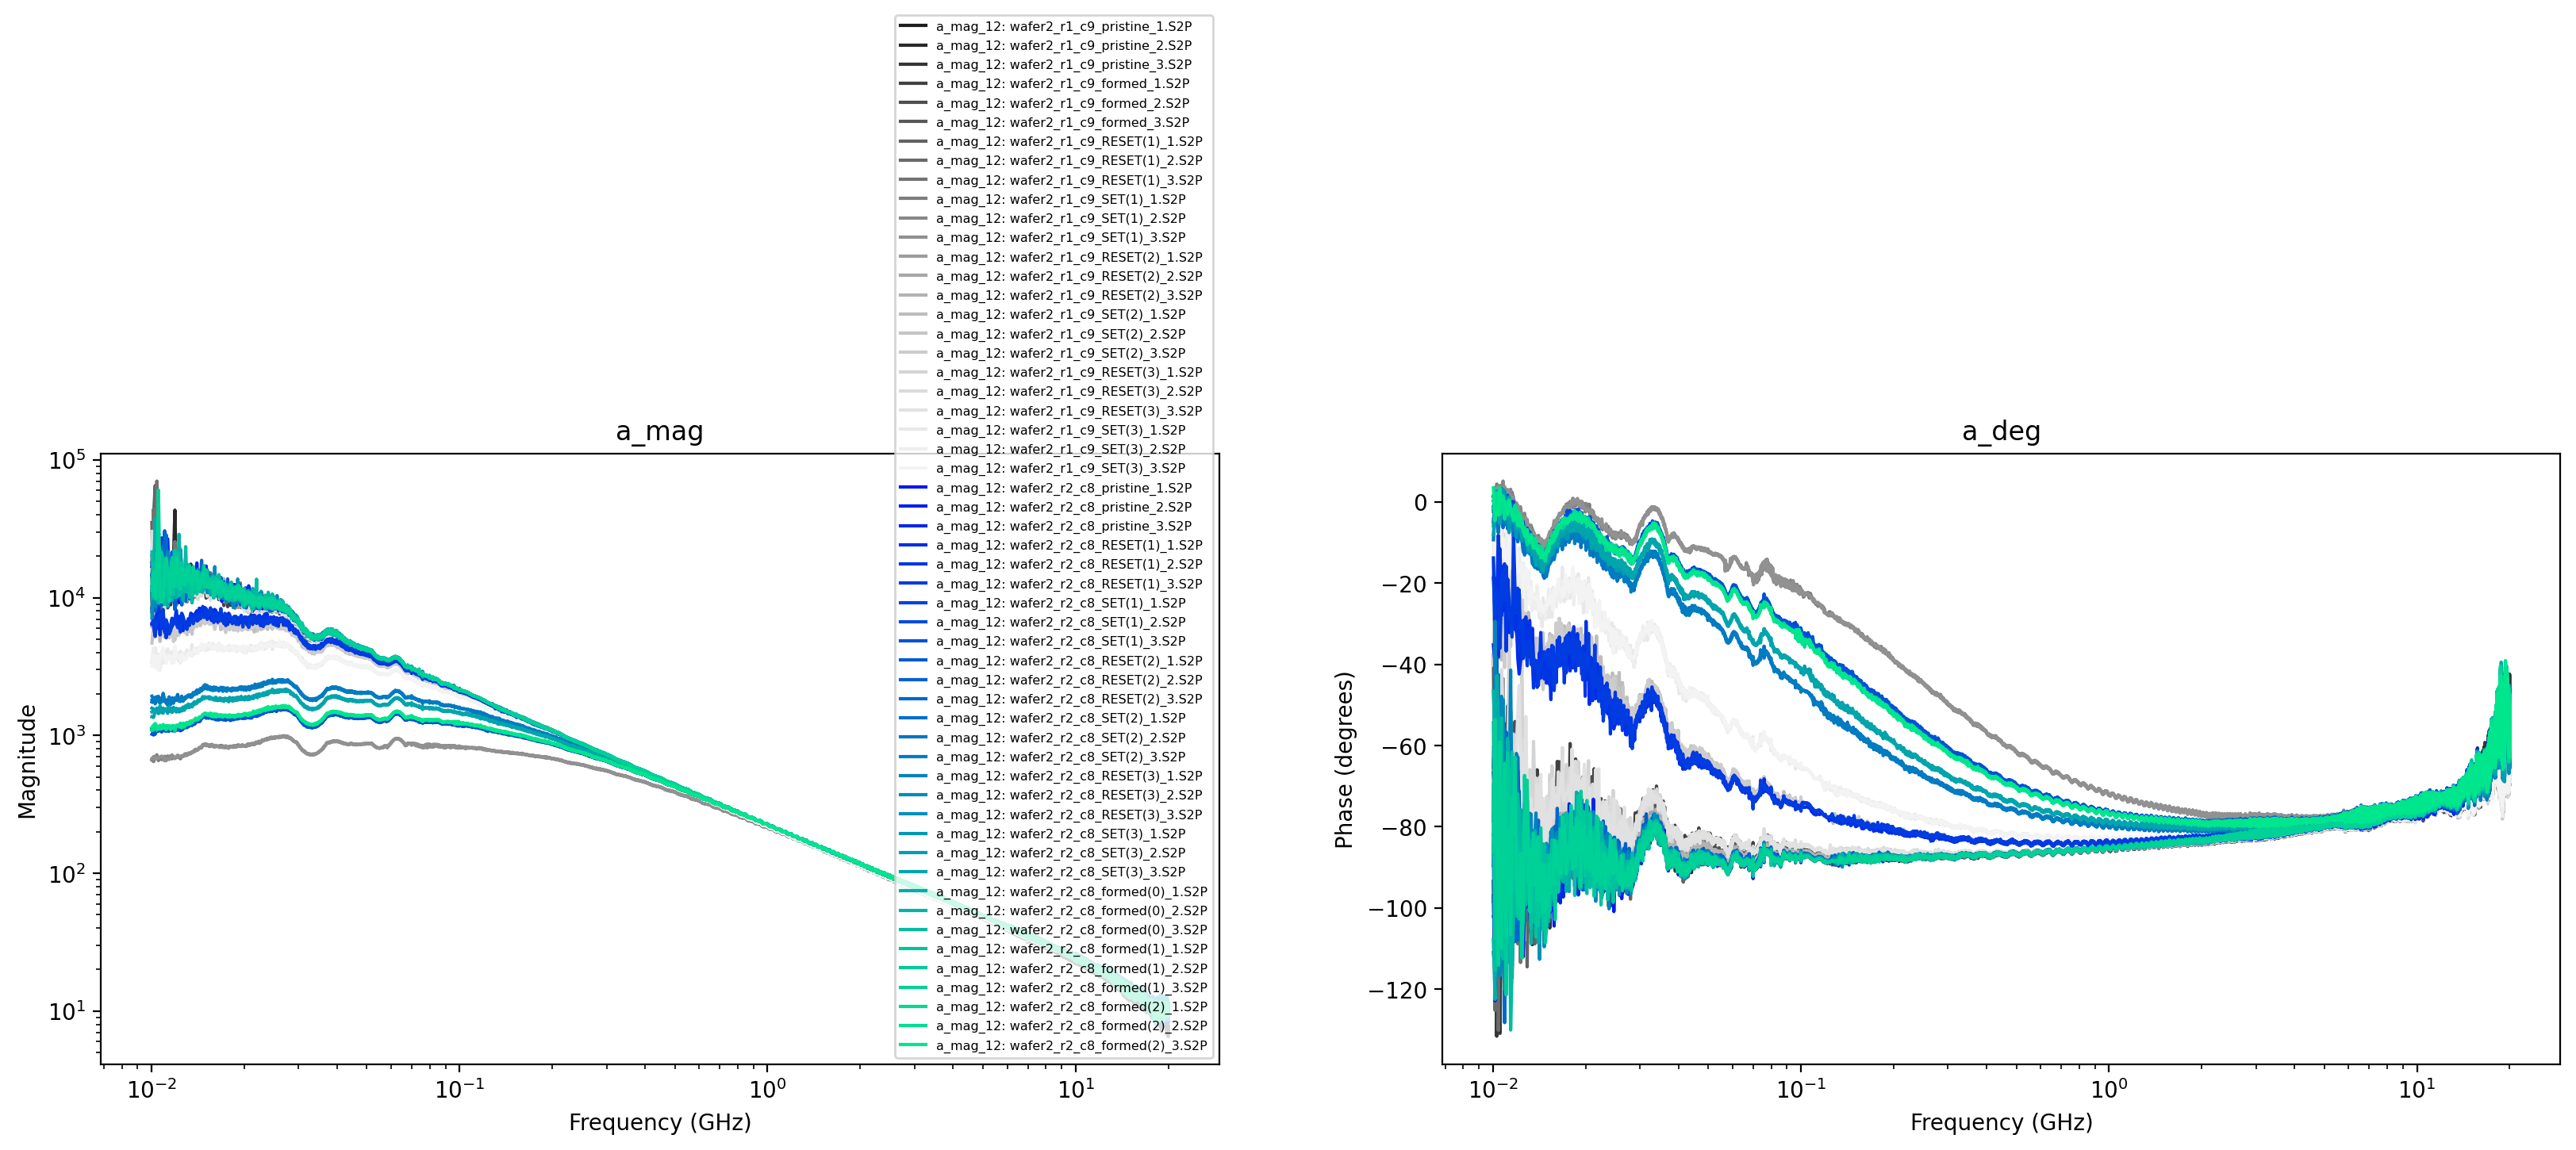

In [7]:
# Select ISS thru, on wafer thru, on wafer open and compare in one color to a pristine/formed/reset device in another color
#raw_data_siox = subgen(s2p_files_1, run_nums =[[4],[28,31,34,37,43]] )
#res_list = [[1.5e4],[1.5e4,7e2,1.5e4,2e3,7e3]]
raw_data_siox = subgen(s2p_files_1,dev_selection=['r1c9','r2c8'])


f = plt.figure(figsize=(20,5),dpi=200)
gs = f.add_gridspec(1, 2)

ax = f.add_subplot(gs[0, 0])
ax1 = f.add_subplot(gs[0, 1])

sub_plot(dev_subset=raw_data_siox, plot_type=['a_mag'], log_x=True,log_y=True, m_port=[1], n_port=[2], deembed_data=False, 
         x_range='0.01-20ghz', ax=ax,p_legend=True)
sub_plot(dev_subset=raw_data_siox, plot_type=['a_deg'], log_x=True, m_port=[1], n_port=[2], deembed_data=False, 
         y_range=None, x_range='0.01-20ghz', ax=ax1,p_legend=False)

plt.show()

## Permittivity from Z from ABCD

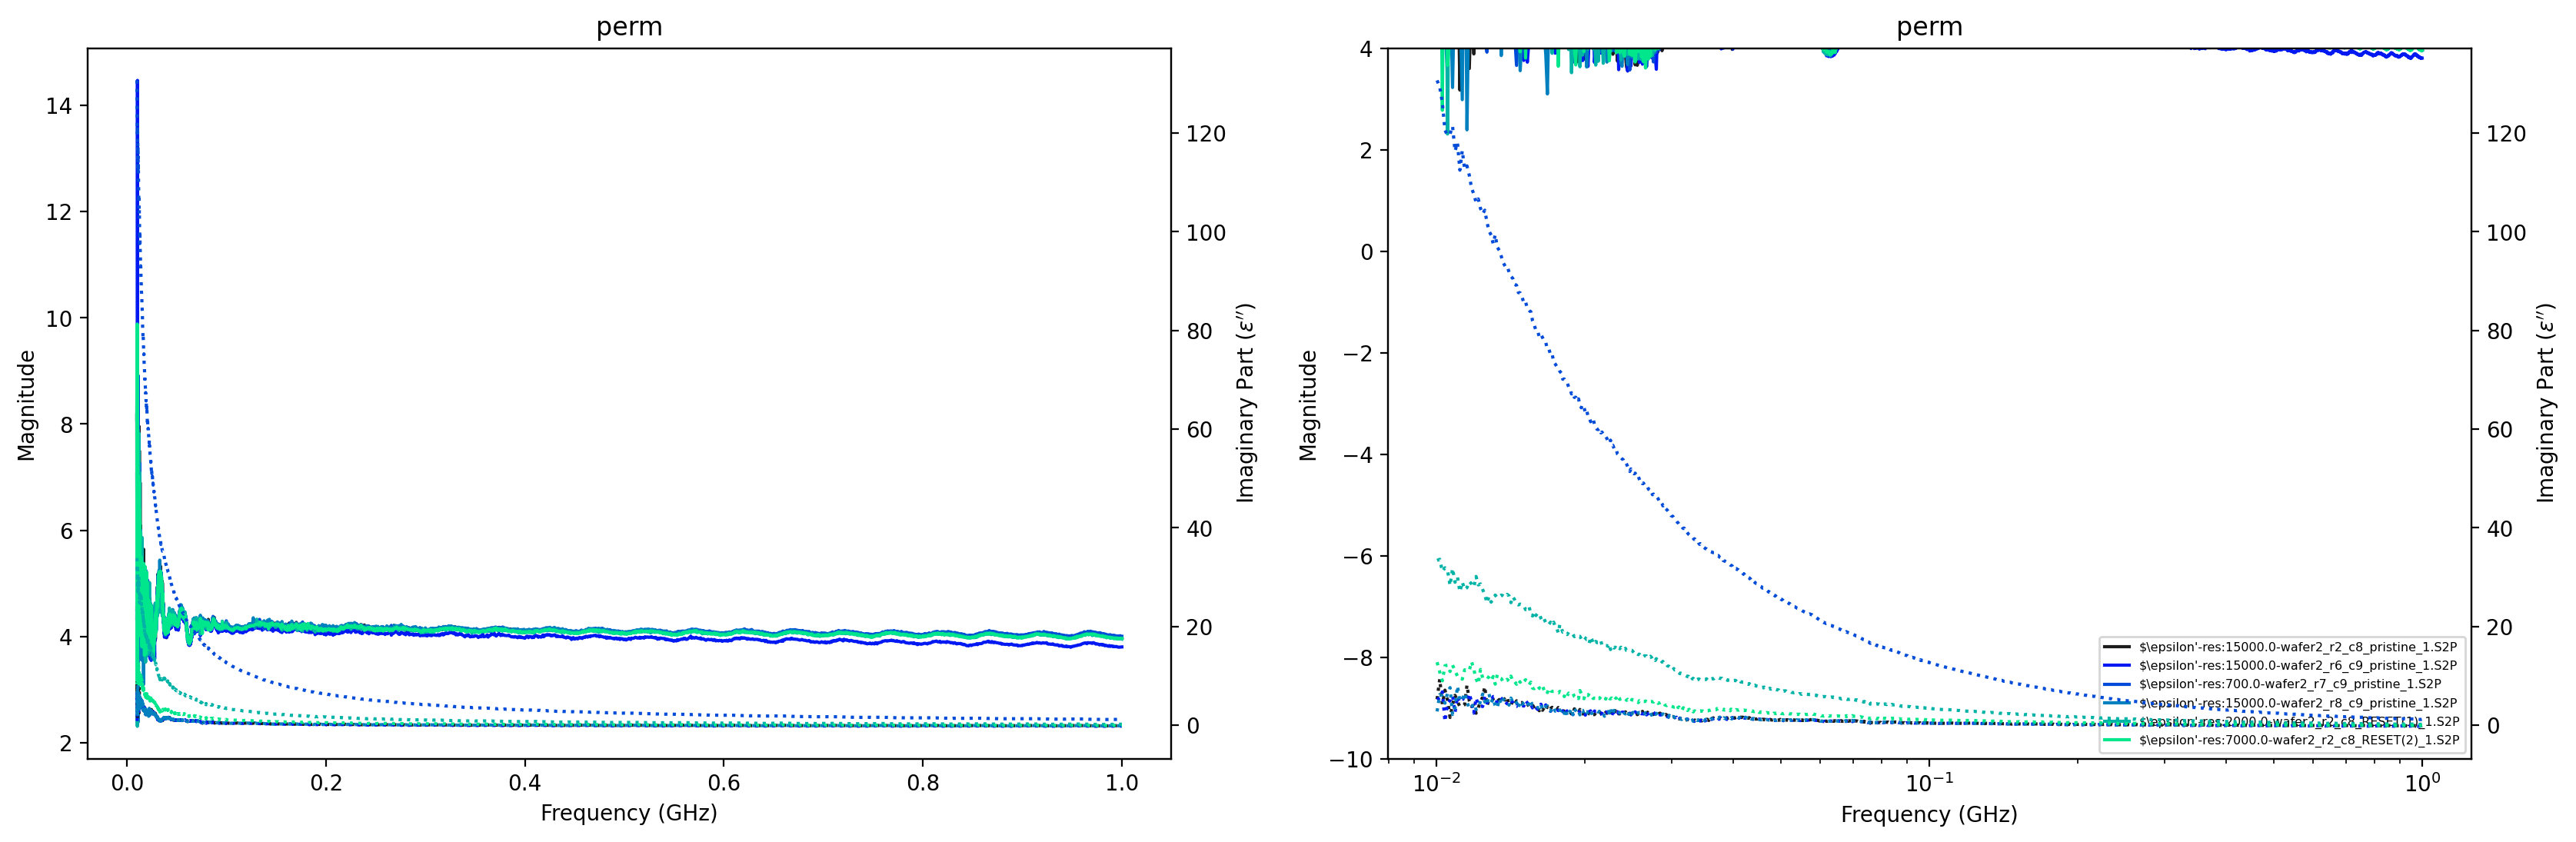

In [8]:
# Select ISS thru, on wafer thru, on wafer open and compare in one color to a pristine/formed/reset device in another color
raw_data_siox = subgen(s2p_files_1, run_nums =[[4],[28,31,34,37,43]] )
res_list = [[1.5e4],[1.5e4,7e2,1.5e4,2e3,7e3]]

f = plt.figure(figsize=(20,6),dpi=200)
gs = f.add_gridspec(1, 2)

ax = f.add_subplot(gs[0, 0])
ax1 = f.add_subplot(gs[0, 1])

sub_plot(dev_subset=raw_data_siox, plot_type=['perm'], log_x=False,log_y=False, m_port=[1], n_port=[2], deembed_data=False, 
         y_range = None,x_range='0.01-1ghz', ax=ax,R_in = res_list,p_legend=False)
sub_plot(dev_subset=raw_data_siox, plot_type=['perm'], log_x=True, m_port=[1], n_port=[2], deembed_data=False, 
         y_range=[-10,4], x_range='0.01-1ghz', R_in = res_list, ax=ax1,p_legend=True)

plt.show()

## Cole Cole plot from Z from ABCD

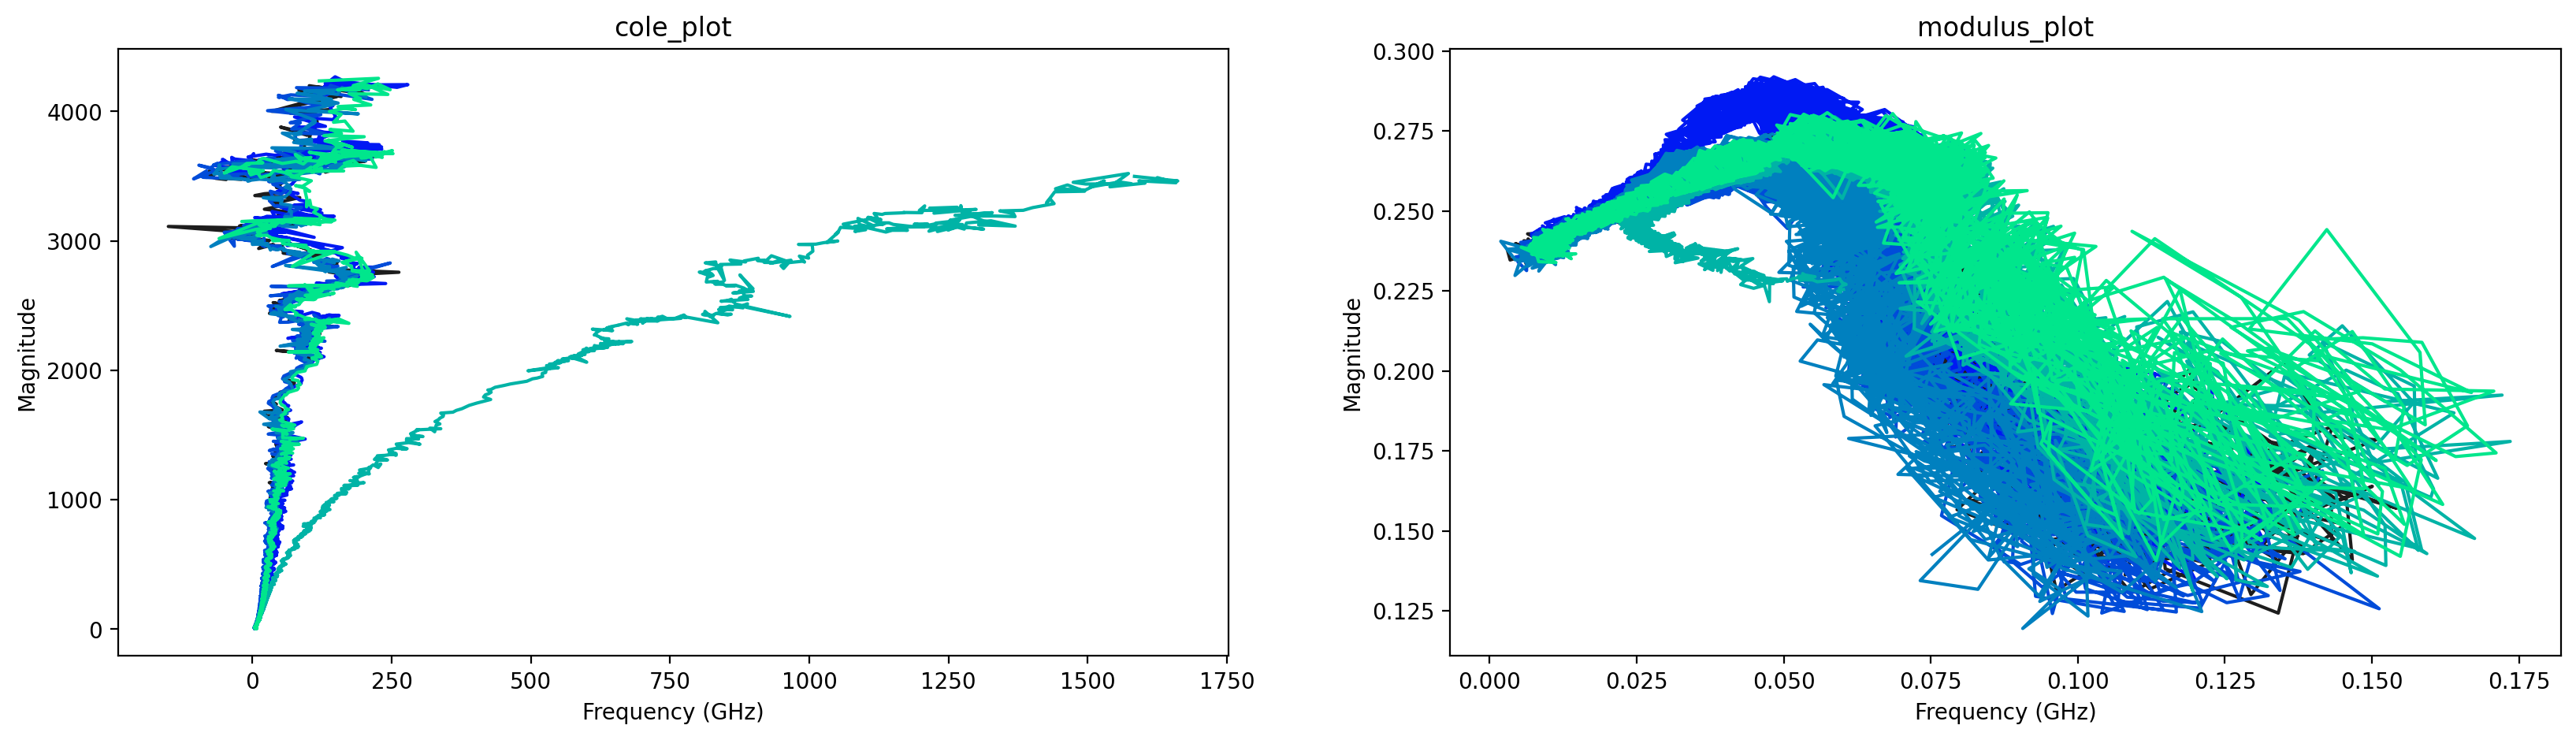

In [9]:

#raw_data_siox = subgen(s2p_files_1, run_nums =[[6],[7,8,9,10,11,12,13,14,15,16]] )

f = plt.figure(figsize=(20,5),dpi=200)
gs = f.add_gridspec(1, 2)

ax = f.add_subplot(gs[0, 0])
ax1 = f.add_subplot(gs[0, 1])

sub_plot(dev_subset=raw_data_siox, plot_type=['cole_plot'], log_x=False,log_y=False, m_port=[1], n_port=[2], deembed_data=False, 
         y_range = None,x_range='0.05-20ghz', ax=ax,p_legend=False)
sub_plot(dev_subset=raw_data_siox, plot_type=['modulus_plot'], log_x=False,log_y=False, m_port=[1], n_port=[2], deembed_data=False, 
         y_range=None, x_range='0.1-20ghz', ax=ax1,p_legend=False)

plt.show()

### Initial Analysis
 - The ISS shows almost no loss for S21 as expected
 - The on wafer CPW thru has quite a low loss
 - The On wafer Thru/Memristor have an oscillation "noise" which is very significant and likely due to an impedance mismatch
    - This noise is greater than the difference between pristine/formed/reset states
    - It will need to be removed before any clear difference between memristor states can be determined

### Open Short De-embedding

In [10]:
#-------------------Grouping-------------------
# Select the On Wafer Calibration files to be used
ISS_thru = [s for s in s2p_files_2 if s.state == 'thru' and s.wafer_number == 0]
cal_thru = [s for s in s2p_files_2 if s.state == 'thru' and s.wafer_number != 0]
cal_open = [s for s in s2p_files_2 if s.state == 'open' or s.state == 'opensig']
cal_short = [s for s in s2p_files_2 if s.state == 'short']

#-------------------De-Embedding-------------------
print('open_short_thru',len(cal_open),len(cal_short),len(cal_thru))
 #whether to plot the de-embedding results
OS = calibration_OS(cal_open, cal_short, cal_thru, plot_cal = False) #calibration object outputted from all the on wafer measurements
TX = calibration_2x(cal_thru, plot_cal = False) #calibration object outputted from all the on wafer measurements

# Plot the data with the deembeding applied and compare to the raw data
f = plt.figure(figsize=(20,8),dpi=200)
gs = f.add_gridspec(1, 2)
ax = f.add_subplot(gs[0, 0])
ax1 = f.add_subplot(gs[0, 1])

# deembeding is applied with an argument in the function and the deembeding object desired is passed to the function
sub_plot(ax=ax, dev_subset=raw_data, plot_type=['s_mag'], log_x=False, m_port=[1], n_port=[1], deembed_data=False, 
         y_range = [0,1.05],x_range='0.01-20ghz', cal_in = [])
sub_plot(ax=ax1, dev_subset=raw_data, plot_type=['s_mag'], log_x=False, m_port=[1], n_port=[1], deembed_data=True, 
         y_range=[0,1.05], x_range='0.01-20ghz',cal_in = OS)

plt.show()

open_short_thru 0 0 0
[]


ValueError: min() arg is an empty sequence

### Notes
- Raw data on left - Open short type de-embedding is applied on the right
- The de-embedding improves the thru device measurably
- Definitely shifts the memristor so more signal going through for s21
- Though the on wafer thru now averages around s21 = 1 - the noise remains just as large!
- The noise continues to prevent any effective comparison between the memristors


### 2x Thru De-embedding

In [ ]:
#-------------------De-Embedding-------------------
TX = calibration_2x(cal_thru, plot_cal = False) #calibration object outputted from all the on wafer measurements

# Plot the data with the deembeding applied and compare to the raw data
f = plt.figure(figsize=(20,8),dpi=200)
gs = f.add_gridspec(1, 2)
ax = f.add_subplot(gs[0, 0])
ax1 = f.add_subplot(gs[0, 1])

# deembeding is applied with an argument in the function and the deembeding object desired is passed to the function
sub_plot(ax=ax, dev_subset=raw_data, plot_type=['s_mag'], log_x=False, m_port=[2], n_port=[1], deembed_data=False, 
         y_range = [0.8,1.05],x_range='0.01-20ghz', cal_in = [])
sub_plot(ax=ax1, dev_subset=raw_data, plot_type=['s_mag'], log_x=False, m_port=[2], n_port=[1], deembed_data=True, 
         y_range=[0.8,1.05], x_range='0.01-20ghz',cal_in = TX)

plt.show()

### Notes
- Raw data on left - 2x thru de-embedding applied on right
- Again de-embedding improves the thru device measurably
- Again Definitely shifts the memristor so more signal going through for s21
- Again Though the on wafer thru now averages around s21 = 1 - the noise remains just as large!
- Difference is that the 2x appears to be better - 
    - though it uses the thru so comparison on a thru device probaly not representative
    - we are using the calibration device to calibrate itself...

### FFT filtering to remove oscillations
- Bandstop filter is applied with the "threshold values" passed to a FFT function
- the FFT function does an inverse FFT to go to the time domain, filters the ranges out then does a forwards FFT to regenerate the data
- This it is hoped can remove the periodic oscillation with frequency seen in all the S-parameter measurements

In [ ]:
# Demo for the on-wafer thru device
thru_filt_test = [copy.deepcopy(cal_thru[0]),copy.deepcopy(cal_thru[1])]
# Select bandstop frequency components
threshold_values = [[1.8e-8,2.2e-8],[5.9e-8,6.15e-8],[3.9e-8,4.05e-8],[2.9e-8,3.05e-8],[7.95e-8,8.05e-8],[6.45e-8,6.55e-8],[6.96e-8,7.06e-8]]
# Apply the FFT, filter out components then IFFT
s2p_test_filt = fourier_filter(thru_filt_test, threshold = threshold_values,t_window = 0.02)

### Notes
- t_window applies a tukey window to the data before applying the FFT - this prevents spectral leakage
- This sacrifices some of the higher and  lower frequencies but massively improves the quality of the filtered data
- a higher t_window value applies a sharper window - so I have kept it as small as possible

In [ ]:
# Plot the data with and without FFT filtering
f = plt.figure(figsize=(20,8),dpi=200)
gs = f.add_gridspec(1, 2)
ax = f.add_subplot(gs[0, 0])
ax1 = f.add_subplot(gs[0, 1])

sub_plot(ax=ax, dev_subset=[[cal_thru[0]],[cal_thru[1]]], plot_type=['s_mag'], log_x=False, m_port=[2], n_port=[1], deembed_data=False, 
         y_range = [0.95,1.0],x_range='0.01-20ghz')
sub_plot(ax=ax1, dev_subset= [s2p_test_filt], plot_type=['s_mag'], log_x=False, m_port=[2], n_port=[1], deembed_data=False, 
         y_range=[0.95,1.0], x_range='0.01-20ghz')

plt.show()

### Notes
- On wafer thru device: RAW data on left, FFT filtered on right
- dramatic improvement through removing the oscillation


### De-embedding on FFT filtered data

In [ ]:
#### Need to re-do the calibration on fully FFT filtered data before applying it!

s2p_files_2_filt = copy.deepcopy(s2p_files_2) #remove the last measurement as it is simulation with different f spacing
# Select bandstop frequency components
threshold_values = [[1.8e-8,2.2e-8],[5.9e-8,6.15e-8],[3.9e-8,4.05e-8],[2.9e-8,3.05e-8],[7.95e-8,8.05e-8],[6.45e-8,6.55e-8],[6.96e-8,7.06e-8]]
# Apply the FFT, filter out components then IFFT
s2p_files_2_filt = fourier_filter(s2p_files_2_filt, threshold = threshold_values,t_window = 0.02) #apply to deepcopy to avoid modifying the original data


#-------------------Grouping-------------------
# Select the On Wafer Calibration files to be used
ISS_thru_filt = [s for s in s2p_files_2_filt if s.state == 'thru' and s.wafer_number == 0]
cal_thru_filt = [s for s in s2p_files_2_filt if s.state == 'thru' and s.wafer_number != 0]
cal_open_filt = [s for s in s2p_files_2_filt if s.state == 'open' or s.state == 'opensig']
cal_short_filt = [s for s in s2p_files_2_filt if s.state == 'short']

#-------------------De-Embedding-------------------
OS_filt = calibration_OS(cal_open_filt, cal_short_filt, cal_thru_filt, plot_cal = False) #calibration object outputted from all the on wafer measurements
TX_filt = calibration_2x(cal_thru_filt, plot_cal = False) #calibration object outputted from all the on wafer measurements


In [ ]:
# Plot the data with and without FFT filtering
f = plt.figure(figsize=(20,16),dpi=200)
gs = f.add_gridspec(3, 1)
ax = f.add_subplot(gs[0, 0])
ax1 = f.add_subplot(gs[1, 0])
ax2 = f.add_subplot(gs[2, 0])

#FFT only
sub_plot(ax=ax, dev_subset=[s2p_test_filt], plot_type=['s_mag'], log_x=False, m_port=[2], n_port=[1],  deembed_data=False, 
         y_range = [0.95,1.02],x_range='0.01-20ghz')
# FFT and OS deembeding
sub_plot(ax=ax1, dev_subset=[s2p_test_filt], plot_type=['s_mag'], log_x=False, m_port=[2], n_port=[1],  deembed_data=True, 
         y_range = [0.95,1.02],x_range='0.01-20ghz',cal_in = OS_filt)
# FFT and 2X deembeding
sub_plot(ax=ax2, dev_subset= [s2p_test_filt], plot_type=['s_mag'], log_x=False, m_port=[2], n_port=[1], deembed_data=True, 
         y_range=[0.95,1.02], x_range='0.01-20ghz',cal_in = TX_filt)

plt.show()

### Notes
- The 2xthru de-embedding applied to the FFT data is almost perfect
    - However, this may only work on the thru which is the only device used in the de-embedding

# FFT filtering on De-embedded data
- Changing the proccesing flow
- Previously I did the FFT filtering then de-embedded the data
- This time I am going to de-embed the data first, then apply the FFT filter to that de-embedded data

In [ ]:


# filter all the data
all_filt_OS = copy.deepcopy(sp2_files_2_OS)
# Select bandstop frequency components
threshold_values = [[1.8e-8,2.2e-8],[5.9e-8,6.15e-8],[3.9e-8,4.05e-8],[2.9e-8,3.05e-8],[7.95e-8,8.05e-8],[6.45e-8,6.55e-8],[6.96e-8,7.06e-8]]
# Apply the FFT, filter out components then IFFT
s2p_2_OS_filt = fourier_filter(all_filt_OS, threshold = threshold_values,t_window = 0.02)

# filter all the data
all_filt_TX = copy.deepcopy(sp2_files_2_TX)
# Select bandstop frequency components
threshold_values = [[1.8e-8,2.2e-8],[5.9e-8,6.15e-8],[3.9e-8,4.05e-8],[2.9e-8,3.05e-8],[7.95e-8,8.05e-8],[6.45e-8,6.55e-8],[6.96e-8,7.06e-8]]
# Apply the FFT, filter out components then IFFT
s2p_2_TX_filt = fourier_filter(all_filt_TX, threshold = threshold_values,t_window = 0.02)  



In [ ]:
# Plot the data with and without FFT filtering
f = plt.figure(figsize=(20,8),dpi=200)
gs = f.add_gridspec(2, 1)
ax = f.add_subplot(gs[0, 0])
ax1 = f.add_subplot(gs[1, 0])


#Open short de-embedded data
sub_plot(ax=ax, dev_subset=[s2p_2_OS_filt], plot_type=['s_mag'], log_x=False, m_port=[2], n_port=[1], deembed_data=False, 
         y_range = [0.95,1.05],x_range='0.01-20ghz')
# 2X de-embedded data
sub_plot(ax=ax1, dev_subset= [s2p_2_TX_filt], plot_type=['s_mag'], log_x=False, m_port=[2], n_port=[1], deembed_data=False, 
         y_range=[0.95,1.05], x_range='0.01-20ghz')


plt.show()

### Notes
- Not a noticable difference between the two process flows
- Though the 2x de-embedding appears perfect, this is deembeding the thru device directly from itself 
    - as the on wafer thru is both the calibration object and the subject to plot and deembed 
    - may not apply as well to devices

### Best so Far on Memristor
FFT all the data, then do the calibration on the FFT filtered data, then do the de-embedding 2x

In [ ]:
# Select the data from the already FFT filtered fulll data set
filtered_memristor = subgen(s2p_files_2_filt, run_nums =[[1,2,6,], [23,42,56] ] )
raw_data_mem = subgen(s2p_files_2, run_nums =[[1,2,6,], [23,42,56] ] )

# Plot the FFT data with and without de embedding
f = plt.figure(figsize=(60,30),dpi=200)
gs = f.add_gridspec(3, 5)
ax = f.add_subplot(gs[0, 0])
ax1 = f.add_subplot(gs[0, 1])

sub_plot(ax=ax, dev_subset = raw_data_mem, plot_type=['s_mag'], log_x=False, m_port=[2], n_port=[1], deembed_data=False, 
         y_range = [0.7,1.0],x_range='0.01-20ghz')
# Apply the filtered TX deembeding to the filtered data
sub_plot(ax=ax1, dev_subset = filtered_memristor, plot_type=['s_mag'], log_x=False, m_port=[2], n_port=[1], deembed_data=True, 
         y_range=[0.7,1.0], x_range='0.01-20ghz',cal_in = TX_filt)

plt.show()

### Notes
- Overall a large improvement in both reducing the noise and increasing the S21 transmission
- Now we can compare memristor states


### Compare CST Simulation Data to the Thru with FFT/De-embedding applied

In [ ]:
# Set global line width
plt.rcParams['lines.linewidth'] = 3  # Change this to your desired line width

# Set global font size for labels on matplotlib plots
plt.rcParams['axes.labelsize'] = 15  # Change this to your desired font size
plt.rcParams['xtick.labelsize'] = 15  # Change this to your desired font size
plt.rcParams['ytick.labelsize'] = 15  # Change this to your desired font size

# Select the data and combine the filtered and simulated data
# thru_standards_comp = subgen(s2p_files_2_filt, run_nums =[[1,2,3,]])
thru_standards_comp = subgen(s2p_files_2_filt, run_nums =[[2,3,]])
thru_standards_comp.append([s2p_files_2_sim])

# Plot the data
f = plt.figure(figsize=(20,10),dpi=200)
gs = f.add_gridspec(2, 2)

ax = f.add_subplot(gs[0, 0])
ax1 = f.add_subplot(gs[0, 1])
ax2 = f.add_subplot(gs[1, 0])
ax3 = f.add_subplot(gs[1, 1])

sub_plot(ax=ax, dev_subset=thru_standards_comp, plot_type=['s_db'], log_x=False, m_port=[2], n_port=[1], deembed_data=False, 
         y_range = [-0.4,0],x_range='0.2-19.8ghz')
sub_plot(ax=ax1, dev_subset=thru_standards_comp, plot_type=['s_deg'], log_x=False, m_port=[2], n_port=[1], deembed_data=False, 
         y_range=[-25,0], x_range='0.2-19.8ghz')
sub_plot(ax=ax2, dev_subset=thru_standards_comp, plot_type=['s_db'], log_x=False, m_port=[1], n_port=[1], deembed_data=False, 
         y_range = [-70,0],x_range='0.2-19.8ghz')
sub_plot(ax=ax3, dev_subset=thru_standards_comp, plot_type=['s_deg'], log_x=False, m_port=[1], n_port=[1], deembed_data=False, 
         y_range=[-150,0], x_range='0.2-19.8ghz')


#plt.savefig(os.path.join(path_out, 'sim_v_thru S_param.svg'), format='svg')

plt.show()

# Memristor state comparison
- Plotting a comparison of the memristor data before(left) and after (right) the FFT/De-embedding
- Comparing SET/RESET states

In [ ]:
# Select the data from the already FFT filtered fulll data set
run_n =[[1,2,3,4,5], [56,60,64,67], [57,58,59,61,62,63,65,66,68] ]
filtered_memristor = subgen(s2p_files_2_filt, run_nums = run_n )
raw_data_mem2 = subgen(s2p_files_2, run_nums = run_n )

# Plot the memristor before and after data processing
f = plt.figure(figsize=(20,8),dpi=200)
gs = f.add_gridspec(1, 2)
ax = f.add_subplot(gs[0, 0])
ax1 = f.add_subplot(gs[0, 1])

# raw memristor data
sub_plot(ax=ax, dev_subset = raw_data_mem2, plot_type=['s_mag'], log_x=True, m_port=[2], n_port=[1], deembed_data=False, 
         y_range = None,x_range='0.1-20ghz')

# Apply the filtered TX deembeding to the filtered data
sub_plot(ax=ax1, dev_subset = filtered_memristor, plot_type=['s_deg'], log_x=False, m_port=[2], n_port=[1], deembed_data=False, 
         y_range=[-30,90], x_range='0.1-20ghz')


#plt.savefig(os.path.join(path_out, 'esmaeel_plot.png'), format='png')

plt.show()

### Notes
- Set is where we see the largest variation due to big differences in the resistance of the LRS
    - potentially filamental vs interface based switching
- RESET into the HRS yields a much tighter range of values
    - Is still a clear variation in the HRS 
- A significant finding here is not only that the resistance switching is visible at the lower frequencies but that at higher frequencies there are clear differences in the S-params which I believe indicates differences in the permittivity/capacitance of devices
- Clearly these devices can be used to modulate microwave signals across a broad range of frequencies which is a good start


### S parameter Real and Imaginary Plot

In [ ]:
# Select the data from the already FFT filtered fulll data set
run_n =[[1,2], [56,60,64,67], [57,58,59,61,62,63,65,66,68] ]
filtered_memristor = subgen(s2p_files_2_filt, run_nums = run_n )

# Plot the memristor before and after data processing
f = plt.figure(figsize=(15,10),dpi=200)
gs = f.add_gridspec(2, 1)
ax = f.add_subplot(gs[0, 0])
ax1 = f.add_subplot(gs[1, 0])

# Real
sub_plot(ax=ax, dev_subset = filtered_memristor, plot_type=['s_re'], log_x=False, m_port=[2], n_port=[1], deembed_data=False, 
         y_range = None,x_range='0.1-20ghz')
# Imag
sub_plot(ax=ax1, dev_subset = filtered_memristor, plot_type=['s_im'], log_x=False, m_port=[2], n_port=[1], deembed_data=False, 
         y_range=None, x_range='0.1-20ghz',cal_in = TX_filt)

plt.show()

### Phase plots

In [ ]:
# Select the data from the already FFT filtered fulll data set
run_n =[[1,2,3,4,5], [56,60,64,67], [57,58,59,61,62,63,65,66,68] ]
filtered_memristor = subgen(s2p_files_2_filt, run_nums = run_n )
raw_data_mem2 = subgen(s2p_files_2, run_nums = run_n )

# Plot the memristor before and after data processing
f = plt.figure(figsize=(20,8),dpi=200)
gs = f.add_gridspec(1, 2)
ax = f.add_subplot(gs[0, 0])
ax1 = f.add_subplot(gs[0, 1])

# raw memristor data
sub_plot(ax=ax, dev_subset = raw_data_mem2, plot_type=['s_deg'], log_x=False, m_port=[2], n_port=[1], deembed_data=False, 
         y_range = [-30,90],x_range='0.1-20ghz')

# Apply the filtered TX deembeding to the filtered data
sub_plot(ax=ax1, dev_subset = filtered_memristor, plot_type=['s_deg'], log_x=True, m_port=[2], n_port=[1], deembed_data=False, 
         y_range=[-30,90], x_range='0.1-20ghz',cal_in = TX_filt)

plt.show()

### Notes
- Can get almost a 90 degree phase shift through forming the device
- Thus can be used as a phase/antiphase coupling device

### Input Imedance
- Inputz is the input impedance which if the memristor were not there would be 50 ohms
    - the memristor adds to the input impedance

In [ ]:
# Select the data from the already FFT filtered fulll data set
run_n =[[1], [56,60,64,67], [57,58,59,61,62,63,65,66,68] ]
filtered_memristor = subgen(s2p_files_2_filt, run_nums = run_n )

# Plot the FFT data with and without de embedding
f = plt.figure(figsize=(20,8),dpi=200)
gs = f.add_gridspec(1, 2)
ax = f.add_subplot(gs[0, 0])
ax1 = f.add_subplot(gs[0, 1])

#Plotting and comparing only the filtered data now
sub_plot(ax=ax, dev_subset = filtered_memristor, plot_type=['inputz'], log_x=True, m_port=[2], n_port=[1], deembed_data=False, 
         y_range = [0,700],x_range='0.1-20ghz',cal_in = TX_filt)
# Apply the filtered TX deembeding to the filtered data
sub_plot(ax=ax1, dev_subset = filtered_memristor, plot_type=['inputz'], log_x=True, m_port=[2], n_port=[1], deembed_data=False, 
         y_range=[-1100,0], x_range='0.1-20ghz',cal_in = OS_filt,p_legend = False)

plt.show()

### Power
- Power shows the power dissipation in the DUT/CPW
    - It is plotted in mW

In [ ]:
# Select the data from the already FFT filtered fulll data set
run_n =[[1], [56,60,64,67], [57,58,59,61,62,63,65,66,68] ]
filtered_memristor = subgen(s2p_files_2_filt, run_nums = run_n )

# Plot the FFT data with and without de embedding
f = plt.figure(figsize=(20,8),dpi=200)
gs = f.add_gridspec(1, 2)
ax = f.add_subplot(gs[0, 0])
ax1 = f.add_subplot(gs[0, 1])

#Power with logx
sub_plot(ax=ax, dev_subset = filtered_memristor, plot_type=['power'], log_x=True, m_port=[2], n_port=[1], deembed_data=False, 
         y_range = None,x_range='0.1-20ghz',cal_in = TX_filt)
# Power zoomed in
sub_plot(ax=ax1, dev_subset = filtered_memristor, plot_type=['power'], log_x=False, m_port=[2], n_port=[1], deembed_data=False, 
         y_range=[0,0.01], x_range='0.1-20ghz',cal_in = OS_filt,p_legend = False)

plt.show()

### Z parameters

In [ ]:
# Select the data from the already FFT filtered fulll data set
run_n =[[1,2], [56,60,64,67], [57,58,59,61,62,63,65,66,68] ]
filtered_memristor = subgen(s2p_files_2_filt, run_nums = run_n )

# Plot the FFT data with and without de embedding
f = plt.figure(figsize=(20,8),dpi=200)
gs = f.add_gridspec(2, 2)
ax = f.add_subplot(gs[0, 0])
ax1 = f.add_subplot(gs[0, 1])
ax2 = f.add_subplot(gs[1, 0])
ax3 = f.add_subplot(gs[1, 1])

#Z params

sub_plot(ax=ax, dev_subset = filtered_memristor, plot_type=['z_mag'], log_x=False, m_port=[1], n_port=[1], deembed_data=False, 
         y_range = [0,1000],x_range='0.1-20ghz',cal_in = TX_filt)
sub_plot(ax=ax1, dev_subset = filtered_memristor, plot_type=['z_mag'], log_x=False, m_port=[1], n_port=[2], deembed_data=False, 
         y_range=[0,1000], x_range='0.1-20ghz',cal_in = OS_filt,p_legend = False)
sub_plot(ax=ax2, dev_subset = filtered_memristor, plot_type=['z_mag'], log_x=False, m_port=[2], n_port=[1], deembed_data=False, 
         y_range = [0,1000],x_range='0.1-20ghz',cal_in = TX_filt)
sub_plot(ax=ax3, dev_subset = filtered_memristor, plot_type=['z_mag'], log_x=False, m_port=[2], n_port=[2], deembed_data=False, 
         y_range=[0,1000], x_range='0.1-20ghz',cal_in = OS_filt,p_legend = False)
 

plt.show()

### ABCD Parameters

In [ ]:
# Select the data from the already FFT filtered fulll data set
run_n =[[1,2], [56,60,64,67], [57,58,59,61,62,63,65,66,68] ]
filtered_memristor = subgen(s2p_files_2_filt, run_nums = run_n )

# Plot the FFT data with and without de embedding
f = plt.figure(figsize=(20,8),dpi=200)
gs = f.add_gridspec(2, 2)
ax = f.add_subplot(gs[0, 0])
ax1 = f.add_subplot(gs[0, 1])
ax2 = f.add_subplot(gs[1, 0])
ax3 = f.add_subplot(gs[1, 1])

#ABCD

sub_plot(ax=ax, dev_subset = filtered_memristor, plot_type=['a_mag'], log_x=False, m_port=[1], n_port=[1], deembed_data=False, 
         y_range = [0,1.1],x_range='0.1-20ghz',cal_in = TX_filt)
sub_plot(ax=ax1, dev_subset = filtered_memristor, plot_type=['a_mag'], log_x=True, m_port=[1], n_port=[2], deembed_data=False, 
         y_range=[0,2500], x_range='0.1-20ghz',cal_in = OS_filt,p_legend = False)
sub_plot(ax=ax2, dev_subset = filtered_memristor, plot_type=['a_mag'], log_x=False, m_port=[2], n_port=[1], deembed_data=False, 
         y_range = [-0.1,0.1],x_range='0.1-20ghz',cal_in = TX_filt)
sub_plot(ax=ax3, dev_subset = filtered_memristor, plot_type=['a_mag'], log_x=False, m_port=[2], n_port=[2], deembed_data=False, 
         y_range=[0,1.1], x_range='0.1-20ghz',cal_in = OS_filt,p_legend = False)
 

plt.show()

### Cap from ABCD and RC parallel

In [ ]:
# Select the data from the already FFT filtered fulll data set
run_n =[[1,2,23,24], [56,60,64,67], [57,58,59,61,62,63,65,66,68] ]
filtered_memristor = subgen(s2p_files_2_filt, run_nums = run_n )

# Plot the memristor before and after data processing
f = plt.figure(figsize=(15,10),dpi=200)
gs = f.add_gridspec(2, 1)
ax = f.add_subplot(gs[0, 0])
ax1 = f.add_subplot(gs[1, 0])

# 
sub_plot(ax=ax, dev_subset = filtered_memristor, plot_type=['cap'], log_x=False, m_port=[2], n_port=[1], deembed_data=False, 
         y_range = [0,0.02],x_range='0.1-20ghz')
# 
sub_plot(ax=ax1, dev_subset = filtered_memristor, plot_type=['cap'], log_x=False, m_port=[2], n_port=[1], deembed_data=False, 
         y_range=[6.25e-13,9.55e-13], x_range='0.1-20ghz',cal_in = TX_filt,p_legend = False, R_in = 30e6)

plt.show()

### Notes
- Very closely matches prediced Capacitance for 20um device
- Clear shifts in Capacitance

### Normalization
- normalising the input impedance and s parameters to a pristine reference measurement
- This shows any difference in Z_in/S_param induced through the switching or DC biasing

In [ ]:
# Select the data from the already FFT filtered fulll data set
run_n =[ [23,56,60,64,67], [23,57,58,59,61,62,63,65,66,68] ]
filtered_memristor = subgen(s2p_files_2_filt, run_nums = run_n )

# Plot the SET/RESET data in z norm and s norm
f = plt.figure(figsize=(20,8),dpi=200)
gs = f.add_gridspec(1, 2)
ax = f.add_subplot(gs[0, 0])
ax1 = f.add_subplot(gs[0, 1])

#Z norm plot
sub_plot(ax=ax, dev_subset = filtered_memristor, plot_type=['znorm'], log_x=False, m_port=[2], n_port=[1], deembed_data=False, 
         y_range = [0.9,1.1],x_range='0.1-20ghz',cal_in = OS_filt)
# S norm plot
sub_plot(ax=ax1, dev_subset = filtered_memristor, plot_type=['snorm'], log_x=False, m_port=[1], n_port=[2], deembed_data=False, 
         y_range=[0.98,1.005], x_range='0.1-20ghz',cal_in = TX_filt)

plt.show()

### Notes
- Clear visible difference in both Z_in and S_params for the Set/RESET devices across the frequency range

### Now let us compare the pristine DC bias measurements in the s-norm mode
- These are pristine devices with a DC bias applied
- Being compared to Eformed devices in SET/RESET

In [ ]:
# Select the data from the already FFT filtered fulll data set
run_n =[ [23,56,60,64,67], [31,27,23,35,39,41],[23,57,58,59,61,62,63,65,66,68] ]
run_n2 = [ [1], [31,27,23,35,39,41]]
run_n3 = [ [23,56,60,64,67], [31,27,23,35,39,41],[27,57,58,59,61,62,63,65,66,68] ]
filtered_memristor = subgen(s2p_files_2_filt, run_nums = run_n )
filtered_memristor2 = subgen(s2p_files_2_filt, run_nums = run_n2 )
filtered_memristor3 = subgen(s2p_files_2_filt, run_nums = run_n3 )

# Plot the FFT data with and without de embedding
f = plt.figure(figsize=(15,10),dpi=200)
gs = f.add_gridspec(3, 1)
ax = f.add_subplot(gs[0, 0])
ax1 = f.add_subplot(gs[1, 0])
ax2 = f.add_subplot(gs[2, 0])

# Comparing the DC biases
sub_plot(ax=ax, dev_subset = filtered_memristor2, plot_type=['snorm'], log_x=False, m_port=[2], n_port=[1], deembed_data=False, 
         y_range = [0.997,1.002],x_range='0.1-20ghz',cal_in = OS_filt)
# Comparing DC biases with switched states
sub_plot(ax=ax1, dev_subset = filtered_memristor, plot_type=['snorm'], log_x=False, m_port=[1], n_port=[2], deembed_data=False, 
         y_range=[0.98,1.005], x_range='0.1-20ghz',cal_in = OS_filt)
# DC biases, switched states but using a different 'pristine' object to normalise
sub_plot(ax=ax2, dev_subset = filtered_memristor3, plot_type=['snorm'], log_x=False, m_port=[1], n_port=[2], deembed_data=False, 
         y_range=[0.98,1.005], x_range='0.1-20ghz',cal_in = OS_filt)

plt.show()

### Notes
- In plot 1 we can see that the DC biasing gives a slight shift in the s-params
    - Though this is incredibly slight and at the limit of the noise
- In plot 2 the DC bias are shown in blue-green with the HRS in greys and the LRS in yellow-orange
- Plot 3 is the same as plot 2 but the normalisation device is changed from pristine, to pristine_DC=0.2V
    - The reason for this is that I wanted to see if the small peaks are a product of normalisation or a consistent difference between pristine/formed devices
    - It appears that there are small localised frequency variations between pristine/formed
    - These may be real features of interest if consistent across other devices and not a product of data processing

### Comparing SET(LRS)/RESET(HRS)

In [ ]:
# Select the data from the already FFT filtered fulll data set
run_n =[ [23,56,60,64,67],[23,57,58,59,61,62,63,65,66,68] ]
#pairs of set/reset to compare
run_n2 = [ [23,56],[56,57],[60,58],[64,59],[67,61] ]

filtered_memristor = subgen(s2p_files_2_filt, run_nums = run_n )
filtered_memristor2 = subgen(s2p_files_2_filt, run_nums = run_n2 )

# Plot the pairs of SET/RESET data
f = plt.figure(figsize=(15,8),dpi=200)
gs = f.add_gridspec(1, 1)
ax = f.add_subplot(gs[0, 0])



# Comparing SET/RESET device pairs
sub_plot(ax=ax, dev_subset = filtered_memristor2, plot_type=['snorm'], log_x=False, m_port=[1], n_port=[2], deembed_data=False, 
         y_range=[0.995,1.002], x_range='0.1-20ghz',cal_in = OS_filt)


plt.show()

### Notes
- These plot have pairs of normalised data where in general the RESET is a flat line and the SET is normalised to that RESET
- Thus the plots that deviate from the flat line are showing the differences induced by Setting the device
- Generally the SET(LRS have lower s21 reflecting lower r? but also changes in c?)
- the first pair of data in grey are pristine vs reset and the spike at 10GHz and a few other places are visible
- These spikes arent visible from SET to RESET implying that if these spikes are created in the forming they are not altered in the SET/RESET process


## DC biasing After Forming

In [ ]:
# Select the DC bias data - first set is pristine, second is dc sweep, third set is held on max negative with one repeat 0dc at end
run_n =[[42],[ 47, 46, 45, 43, 42, 48, 49, 50],[50,51,52,53,54,55]]
# First look at the DC bias data
run_n2 =[[42],[42, 47, 46, 45, 43, 42, 48, 49, 50],]
# Now look at "edge of forming" data
run_n3 =[[42],[42,50,51,52,53,54, 55]]

filtered_memristor = subgen(s2p_files_2_filt, run_nums = run_n )
filtered_memristor2 = subgen(s2p_files_2_filt, run_nums = run_n2 )
filtered_memristor3 = subgen(s2p_files_2_filt, run_nums = run_n3 )

# Plot the s params and the normalised s data
f = plt.figure(figsize=(15,14),dpi=200)
gs = f.add_gridspec(3, 1)
ax = f.add_subplot(gs[0, 0])
ax1 = f.add_subplot(gs[1, 0])
ax2 = f.add_subplot(gs[2, 0])


# S params for all DC bias data 
sub_plot(ax=ax, dev_subset = filtered_memristor, plot_type=['s_mag'], log_x=False, m_port=[2], n_port=[1], deembed_data=False, 
         y_range = None,x_range='0.1-19.8ghz',cal_in = OS_filt)
# Comparing DC bias sweep
sub_plot(ax=ax1, dev_subset = filtered_memristor2, plot_type=['snorm'], log_x=False, m_port=[1], n_port=[2], deembed_data=False, 
         y_range=[0.998,1.0005], x_range='0.1-20ghz',cal_in = OS_filt)
# Holding on edge of switching and repeating the VNA measurement
sub_plot(ax=ax2, dev_subset = filtered_memristor3, plot_type=['snorm'], log_x=False, m_port=[1], n_port=[2], deembed_data=False, 
         y_range=[0.995,1.001], x_range='0.1-20ghz',cal_in = OS_filt)


plt.show()

### Notes
- First plot shows s-params are very consistent with DC and don't change a lot
- Second plot shows that in stable device range the DC gives a subtle systematic shift to the S-params
- Third plot shows that when DC bias is held at edge of switching device starts to switch and s-params change more dramatically
    - notably the last measurement is a repeat on 0V DC after the other measurements to show the permenant change in the devices state

# Old Code Ignore below...

In [ ]:
#-------------------Network Set-------------------
#takes a dictionary or list of networks as its input and converts to a network set object that can give errors etc for repeated measurements
# Convert the dev dictionary of lists of s2p files into a dictionary of lists of networks

#need filtering, probably taken from the keyplot function to select the devices and states to include in the network set
# probably actually just want to make this another keyplot function that takes the network set as an input and then plots the data

# dev_networks = {}
# for key, value in dev.items():
#     dev_networks[key] = [s.network for s in value]

# ro_ns = NetworkSet(dev_networks, name='ro set')
